<a href="https://colab.research.google.com/github/mohdishaqedunet-cmyk/TASK-11/blob/main/TASK_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)

import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [2]:
df = pd.read_csv("/content/breast-cancer.csv")


In [3]:
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
display(df['diagnosis'].describe())

,diagnosis
count,569
unique,2
top,B
freq,357


In [9]:
y.value_counts(normalize=True)


,proportion
diagnosis,
B,0.627417
M,0.372583


In [26]:
X = df.drop(['id', 'diagnosis'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [14]:
linear_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="linear"))
])


In [15]:
linear_pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(kernel='linear'))])

In [16]:
y_pred_linear = linear_pipeline.predict(X_test)

print("Linear SVM Accuracy:",
      accuracy_score(y_test, y_pred_linear))


Linear SVM Accuracy: 0.9649122807017544


In [17]:
rbf_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf"))
])

rbf_pipeline.fit(X_train, y_train)

y_pred_rbf = rbf_pipeline.predict(X_test)

print("RBF SVM Accuracy:",
      accuracy_score(y_test, y_pred_rbf))


RBF SVM Accuracy: 0.9736842105263158


In [18]:
param_grid = {
    "svm__C": [0.1, 1, 10, 100],
    "svm__gamma": [0.001, 0.01, 0.1, 1]
}


In [19]:
grid = GridSearchCV(
    Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVC(kernel="rbf", probability=True))
    ]),
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': [0.001, 0.01, 0.1, 1]},
             scoring='accuracy')

In [20]:
print("Best parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)


Best parameters: {'svm__C': 10, 'svm__gamma': 0.01}
Best CV accuracy: 0.9736263736263737


In [21]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)


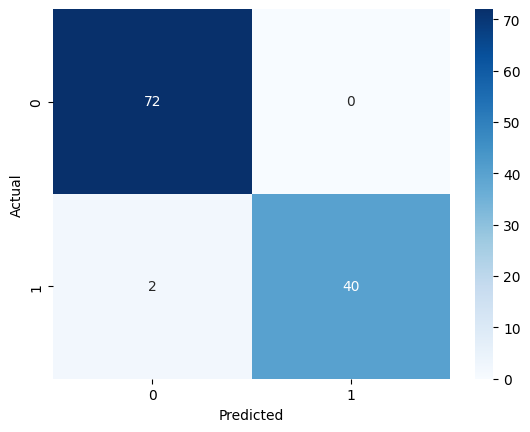

In [22]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [23]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           B       0.97      1.00      0.99        72
           M       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [24]:
y_probs = best_model.predict_proba(X_test)[:, 1]


In [27]:
y_test_encoded = y_test.map({'B': 0, 'M': 1})
fpr, tpr, _ = roc_curve(y_test_encoded, y_probs)
auc_score = roc_auc_score(y_test_encoded, y_probs)

print("AUC:", auc_score)

AUC: 0.996031746031746


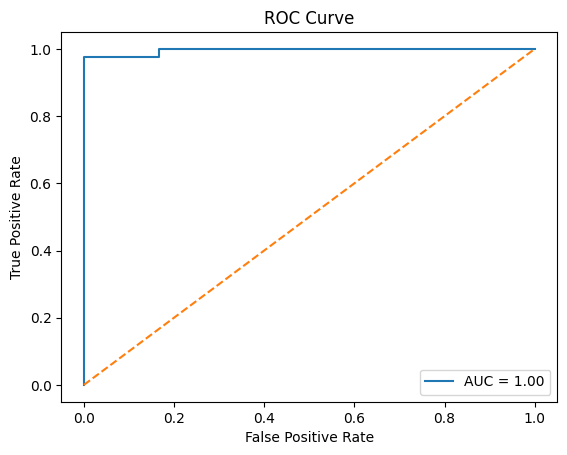

In [28]:
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [29]:
joblib.dump(best_model, "svm_pipeline.pkl")


['svm_pipeline.pkl']

In [30]:
model = joblib.load("svm_pipeline.pkl")
